<a href="https://colab.research.google.com/github/Muhammad-Gunzalas/Artificial_Neural_Network_with-_Tensorflow/blob/main/Loan_Prediction_Using_Artificial_Neural_Networks_Project_of_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1548]:
import pandas as pd

In [1549]:
data=pd.read_csv("/content/loan_data.csv")

In [1550]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [1551]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1552]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [1553]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [1554]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1555]:
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [1556]:
data['Gender']=data['Gender'].map({'Male':0,'Female':1})

In [1557]:
data['Gender'].value_counts()

0    502
1    112
Name: Gender, dtype: int64

In [1558]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [1559]:
data['Married']=data['Married'].map({'No':0,'Yes':1})

In [1560]:
data['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [1561]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [1562]:
data['Dependents']=data['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [1563]:
data['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [1564]:
data['Education']=data['Education'].map({'Graduate':0,'Not Graduate':1})

In [1565]:
data['Education'].value_counts()

0    480
1    134
Name: Education, dtype: int64

In [1566]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,1,1,0,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,1,0,0,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,1,0,1,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,0,0,0,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [1567]:
data['Self_Employed']=data['Self_Employed'].map({'No':0,'Yes':1})

In [1568]:
data['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [1569]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [1570]:
data["Property_Area"]=data['Property_Area'].map({'Semiurban':0,'Urban':1,'Rural':2})

In [1571]:
data['Property_Area'].value_counts()

0    233
1    202
2    179
Name: Property_Area, dtype: int64

In [1572]:
data['Loan_Status']=data['Loan_Status'].map({'N':0,'Y':1})

In [1573]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,1
1,LP001003,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,LP001005,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,1


# Min MAx Normalization

In [1574]:
data['Gender']=(data['Gender']-data['Gender'].min())/(data['Gender'].max()-data['Gender'].min())

In [1575]:
data['Gender'].value_counts()

0.0    502
1.0    112
Name: Gender, dtype: int64

In [1576]:
data['Gender']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
609    1.0
610    0.0
611    0.0
612    0.0
613    1.0
Name: Gender, Length: 614, dtype: float64

In [1577]:
data=data.drop(['Loan_ID'],axis=1)

In [1578]:
for i in data.columns:
    data[i]=(data[i]-data[i].min())/(data[i].max()-data[i].min())

In [1579]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,0.5,1.0
1,0.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,1.0,0.0
2,0.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,0.5,1.0
3,0.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,0.5,1.0
4,0.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,0.5,1.0


In [1580]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.743590,1.0,0.5,1.0
1,0.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,1.0,0.0
2,0.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,0.5,1.0
3,0.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,0.5,1.0
4,0.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.000000,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,1.0,1.0
610,0.0,1.0,1.000000,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,1.0,1.0
611,0.0,1.0,0.333333,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,0.5,1.0
612,0.0,1.0,0.666667,0.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,0.5,1.0


In [1581]:
data.dtypes

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [1582]:
x=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [1583]:
x.shape , y.shape

((614, 11), (614,))

In [1584]:
from sklearn.model_selection import train_test_split

In [1585]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=42,stratify=y,test_size=0.3)

In [1586]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape 

((429, 11), (185, 11), (429,), (185,))

In [1587]:
import keras

In [1588]:
import tensorflow as tf

In [1589]:
from keras.models import Sequential

In [1590]:
from keras.layers import InputLayer , Dense

In [1591]:
x_train.shape

(429, 11)

In [1592]:
x_train.shape[1]

11

In [1593]:
input_neuron=x_train.shape[1]

In [1594]:

output_neurons=1

In [1595]:
model=Sequential()

In [1596]:
model.add(InputLayer(input_shape=(input_neuron)))

In [1597]:
#model.add(Dense(units=200,activation='relu'))

In [1598]:
#model.add(Dense(units=200,activation='relu'))

In [1599]:
#model.add(Dense(units=100,activation='relu'))

In [1600]:
#model.add(Dense(units=100,activation='relu'))

In [1601]:
model.add(Dense(units=10,activation='relu'))

In [1602]:
model.add(Dense(units=10,activation='relu'))

In [1603]:
model.add(Dense(units=5,activation='relu'))

In [1604]:
model.add(Dense(units=output_neurons,activation='sigmoid'))

In [1605]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_107 (Dense)           (None, 10)                120       
                                                                 
 dense_108 (Dense)           (None, 10)                110       
                                                                 
 dense_109 (Dense)           (None, 5)                 55        
                                                                 
 dense_110 (Dense)           (None, 1)                 6         
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


Compile the Model 

In [1606]:
#loss using binary classification because our problem is binary classification
#using optimizer ad Adam(Stochastic gradient descent) 
#Evaluating matrics as Accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [1607]:
# from keras.saving.saving_lib import save_weights_only
# checkpoint=tf.keras.callbacks.ModelCheckpoint('best_weight.h5',verbose=1,save_best_only=True,save_weights_only=True)
# early_stop=tf.keras.callbacks.EarlyStopping(patience=4)

In [1608]:
model_history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=500)

Epoch 1/500
14/14 [==============================] - 1s 20ms/step - loss: 0.7369 - accuracy: 0.3124 - val_loss: 0.7228 - val_accuracy: 0.3459
Epoch 2/500
14/14 [==============================] - 0s 6ms/step - loss: 0.7128 - accuracy: 0.3473 - val_loss: 0.7021 - val_accuracy: 0.3784
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6965 - accuracy: 0.4615 - val_loss: 0.6865 - val_accuracy: 0.5297
Epoch 4/500
14/14 [==============================] - 0s 7ms/step - loss: 0.6859 - accuracy: 0.6014 - val_loss: 0.6771 - val_accuracy: 0.6649
Epoch 5/500
14/14 [==============================] - 0s 8ms/step - loss: 0.6787 - accuracy: 0.7086 - val_loss: 0.6689 - val_accuracy: 0.7568
Epoch 6/500
14/14 [==============================] - 0s 8ms/step - loss: 0.6725 - accuracy: 0.7646 - val_loss: 0.6611 - val_accuracy: 0.7892
Epoch 7/500
14/14 [==============================] - 0s 7ms/step - loss: 0.6669 - accuracy: 0.7646 - val_loss: 0.6555 - val_accuracy: 0.8324
Epoch 8/500


In [1609]:
prediction=model.predict(x_test)

6/6 [==============================] - 0s 2ms/step


In [1610]:
#prediction.value_counts()

In [1611]:
from sklearn.metrics import top_k_accuracy_score,accuracy_score

In [1612]:
#top_k_accuracy_score(y_test,prediction)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1802: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(


1.0

In [1613]:
#accuracy_score(y_test,prediction)

Visualization the Model Performnace

In [1614]:
import matplotlib.pyplot as plt

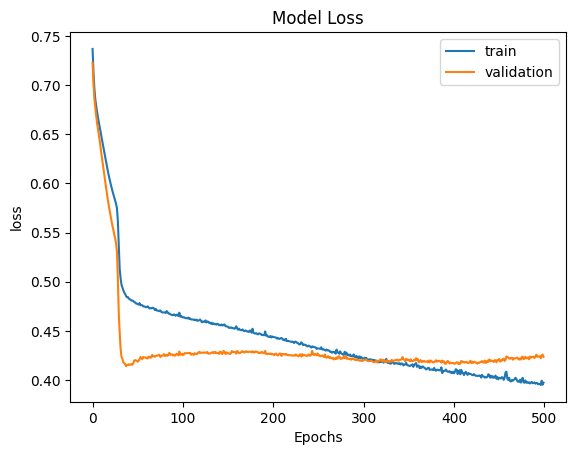

In [1615]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'],loc='upper right')
plt.show()

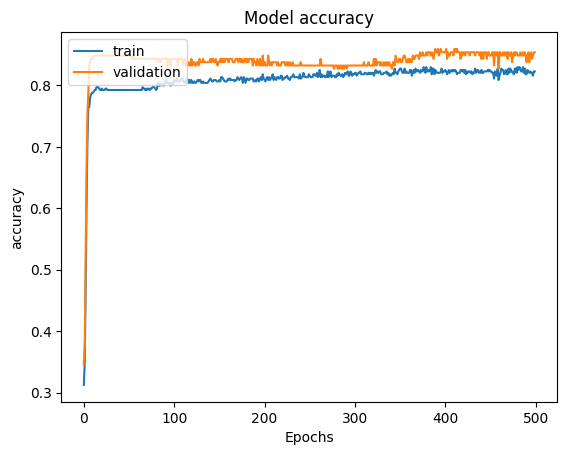

In [1616]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [1640]:
# Now load Model for saving best weights 

In [1618]:
model=Sequential()

In [1619]:
model.add(InputLayer(input_shape=(input_neuron)))

In [1620]:
model.add(Dense(units=10,activation='relu'))

In [1621]:
model.add(Dense(units=10,activation='relu'))

In [1622]:
model.add(Dense(units=5,activation='relu'))

In [1623]:
model.add(Dense(units=output_neurons,activation='sigmoid'))

In [1624]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_111 (Dense)           (None, 10)                120       
                                                                 
 dense_112 (Dense)           (None, 10)                110       
                                                                 
 dense_113 (Dense)           (None, 5)                 55        
                                                                 
 dense_114 (Dense)           (None, 1)                 6         
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [1625]:
#loss using binary classification because our problem is binary classification
#using optimizer ad Adam(Stochastic gradient descent) 
#Evaluating matrics as Accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])

In [1626]:
from keras.saving.saving_lib import save_weights_only
checkpoint=tf.keras.callbacks.ModelCheckpoint('best_weight.h5',verbose=1,save_best_only=True,save_weights_only=True)
early_stop=tf.keras.callbacks.EarlyStopping(patience=4)

In [1627]:
model_history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=500,callbacks=[checkpoint,early_stop])

Epoch 1/500
 1/14 [=>............................] - ETA: 15s - loss: 0.7028 - accuracy: 0.6562 - precision: 0.8333 - recall: 0.5263
Epoch 1: val_loss improved from inf to 0.69092, saving model to best_weight.h5
14/14 [==============================] - 2s 29ms/step - loss: 0.7038 - accuracy: 0.5105 - precision: 0.7073 - recall: 0.4915 - val_loss: 0.6909 - val_accuracy: 0.5892 - val_precision: 0.7073 - val_recall: 0.6850
Epoch 2/500
 1/14 [=>............................] - ETA: 0s - loss: 0.6847 - accuracy: 0.6250 - precision: 0.8571 - recall: 0.6667
Epoch 2: val_loss improved from 0.69092 to 0.67536, saving model to best_weight.h5
14/14 [==============================] - 0s 7ms/step - loss: 0.6826 - accuracy: 0.6597 - precision: 0.7224 - recall: 0.8203 - val_loss: 0.6754 - val_accuracy: 0.6595 - val_precision: 0.7025 - val_recall: 0.8740
Epoch 3/500
 1/14 [=>............................] - ETA: 0s - loss: 0.6739 - accuracy: 0.6250 - precision: 0.6957 - recall: 0.7619
Epoch 3: val_loss 

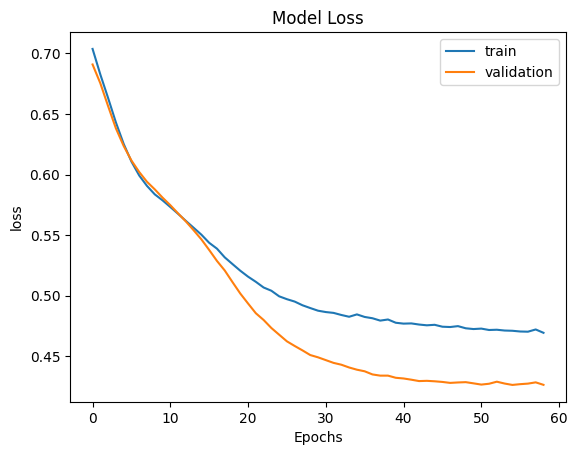

In [1628]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'],loc='upper right')
plt.show()

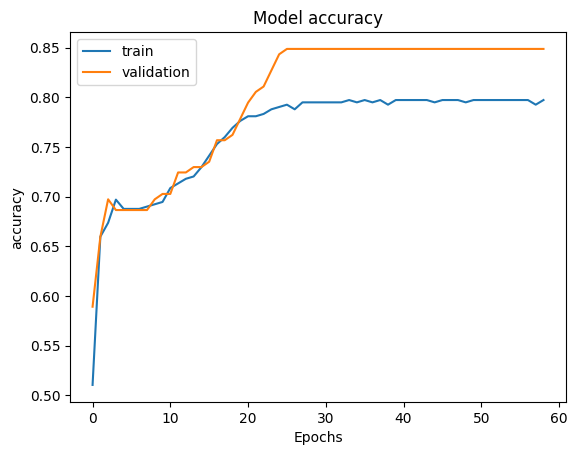

In [1629]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'],loc='upper left')
plt.show()

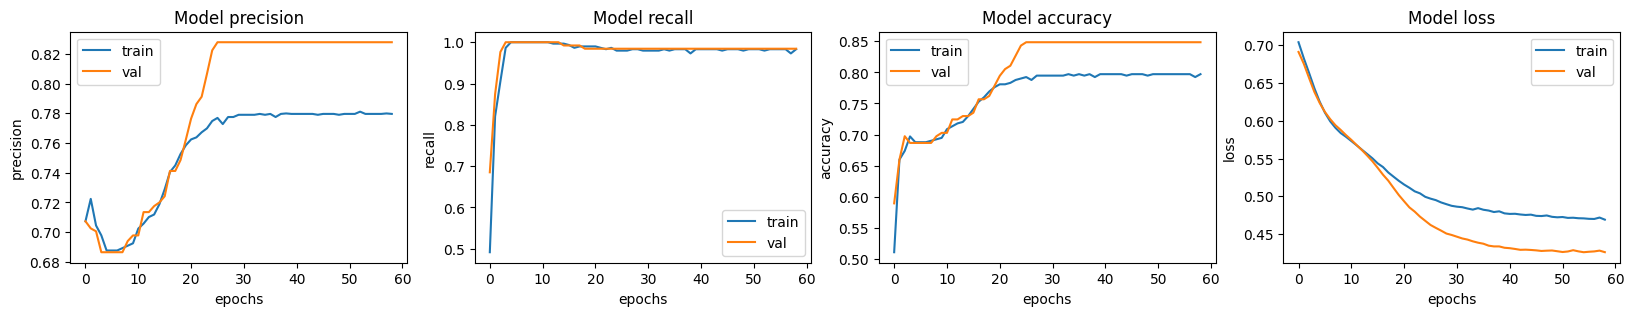

In [1641]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(model_history.history[met])
    ax[i].plot(model_history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [1631]:
#load best weights
model.load_weights('best_weight.h5')

In [1632]:
#save whole model(weight + architechure)
model.save('model.h5')

In [1633]:
loaded_model=tf.keras.models.load_model('model.h5')

In [1634]:
loaded_model

In [1637]:
loss , acc , prec, rec = loaded_model.evaluate(x_test,y_test)

6/6 [==============================] - 1s 7ms/step - loss: 0.4261 - accuracy: 0.8486 - precision: 0.8278 - recall: 0.9843


In [1639]:
print("Loss:",loss)
print("Testing Accuracy:",acc)
print("Testing Precision:",prec)
print("Testing Recall:",rec)

Loss: 0.4261353313922882
Testing Accuracy: 0.8486486673355103
Testing Precision: 0.8278145790100098
Testing Recall: 0.9842519760131836
